# KNN using Rice(Commeo and Osmancik) Dataset

In [51]:
!pip install ucimlrepo

In [52]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [53]:
from sklearn.preprocessing import normalize
X = normalize(X)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [56]:
y_pred = neigh.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_test)

Accuracy: 0.9046369203849519


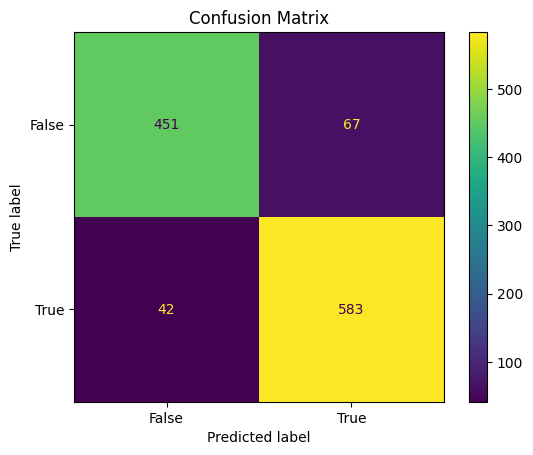

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.91      0.87      0.89       518
    Osmancik       0.90      0.93      0.91       625

    accuracy                           0.90      1143
   macro avg       0.91      0.90      0.90      1143
weighted avg       0.91      0.90      0.90      1143



In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

k_values = [2, 3, 4, 5, 6, 7, 8, 9]
test_split_list = [0.3, 0.25, 0.2]
metrics = []

if len(y.shape) > 1:
    y = y.squeeze()

le = LabelEncoder()
y = le.fit_transform(y)

for value in k_values:
    for test_split in test_split_list:
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_split, random_state = 42)
        neigh = KNeighborsClassifier(n_neighbors=value)
        neigh.fit(x_train, y_train)
        y_pred = neigh.predict(x_test)

        f1 = round(f1_score(y_test, y_pred), 4)
        precision = round(precision_score(y_test, y_pred), 4)
        recall = round(recall_score(y_test, y_pred), 4)
        accuracy = round(accuracy_score(y_test, y_pred), 4)

        metrics.append([value, test_split, f1, precision, recall, accuracy])

In [61]:
!pip install tabulate

In [62]:
from tabulate import tabulate

headers = [ "K Value", "Test Split", "F1 Score", "Precision", "Recall", "Accuracy"]
table = tabulate(metrics, headers=headers, tablefmt="pretty")

print(table)

+---------+------------+----------+-----------+--------+----------+
| K Value | Test Split | F1 Score | Precision | Recall | Accuracy |
+---------+------------+----------+-----------+--------+----------+
|    2    |    0.3     |  0.8974  |  0.9297   | 0.8672 |  0.8915  |
|    2    |    0.25    |  0.9006  |  0.9379   | 0.8662 |  0.8951  |
|    2    |    0.2     |  0.8959  |  0.9388   | 0.8568 |  0.8924  |
|    3    |    0.3     |  0.9193  |  0.9003   | 0.9392 |  0.9099  |
|    3    |    0.25    |  0.9287  |  0.9116   | 0.9465 |  0.9203  |
|    3    |    0.2     |  0.9209  |   0.91    | 0.932  |  0.9134  |
|    4    |    0.3     |  0.9147  |  0.9206   | 0.9088 |  0.9073  |
|    4    |    0.25    |  0.9149  |  0.9256   | 0.9044 |  0.9077  |
|    4    |    0.2     |  0.9111  |  0.9271   | 0.8956 |  0.9055  |
|    5    |    0.3     |  0.9145  |  0.8969   | 0.9328 |  0.9046  |
|    5    |    0.25    |  0.9176  |  0.8991   | 0.9369 |  0.9077  |
|    5    |    0.2     |  0.9148  |   0.905   | 

# Decision Trees and Random Forest using Raisin Dataset

In [63]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)

{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar, Murat Koklu, Sakir Tasdemir

In [64]:
X = normalize(X)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

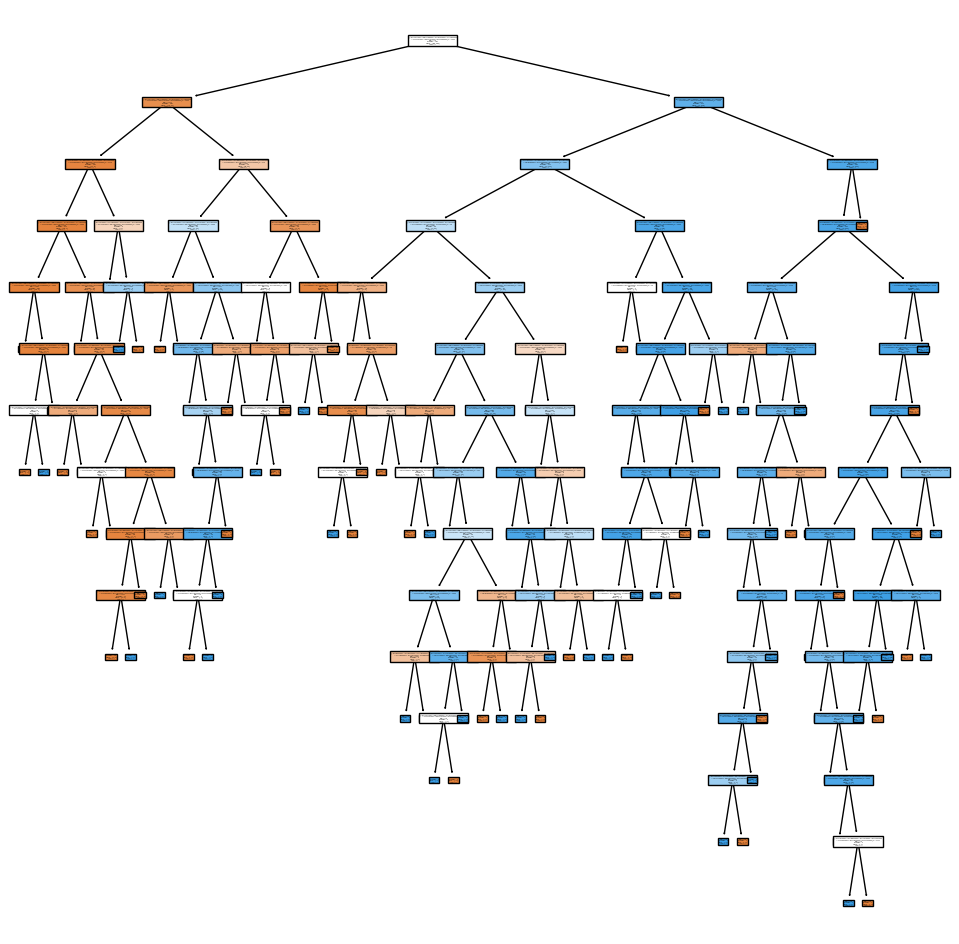

In [67]:
fig = plt.figure(figsize=(12,12))
_ = tree.plot_tree(clf,
                  feature_names = list(X),
                  class_names=['0','1'],
                  filled=True)
plt.show()

In [68]:
y_pred = clf.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_test)

Accuracy: 0.8


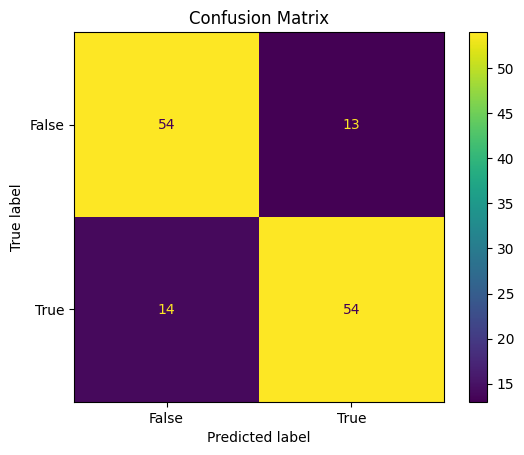

In [69]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Besni       0.79      0.81      0.80        67
     Kecimen       0.81      0.79      0.80        68

    accuracy                           0.80       135
   macro avg       0.80      0.80      0.80       135
weighted avg       0.80      0.80      0.80       135



# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree as x

In [72]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

<ipython-input-72-ce55d9827ec2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

[Text(0.5041232638888888, 0.9666666666666667, 'x[4] <= 0.72\ngini = 0.5\nsamples = 482\nvalue = [372, 393]'),
 Text(0.2339409722222222, 0.9, 'x[6] <= 0.009\ngini = 0.49\nsamples = 293\nvalue = [198, 265]'),
 Text(0.11458333333333333, 0.8333333333333334, 'x[5] <= 0.0\ngini = 0.215\nsamples = 116\nvalue = [158, 22]'),
 Text(0.0763888888888889, 0.7666666666666667, 'x[0] <= 0.7\ngini = 0.144\nsamples = 107\nvalue = [154, 13]'),
 Text(0.041666666666666664, 0.7, 'x[6] <= 0.008\ngini = 0.093\nsamples = 90\nvalue = [136, 7]'),
 Text(0.027777777777777776, 0.6333333333333333, 'gini = 0.0\nsamples = 59\nvalue = [96, 0]'),
 Text(0.05555555555555555, 0.6333333333333333, 'x[3] <= 0.0\ngini = 0.254\nsamples = 31\nvalue = [40, 7]'),
 Text(0.027777777777777776, 0.5666666666666667, 'x[5] <= 0.0\ngini = 0.278\nsamples = 4\nvalue = [1, 5]'),
 Text(0.013888888888888888, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 5]'),
 Text(0.0833

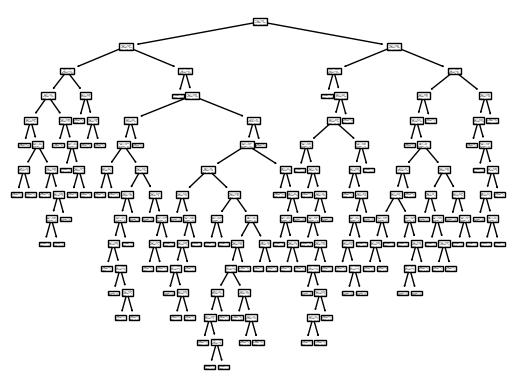

In [73]:
tree.plot_tree(rf.estimators_[0])

In [74]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_test)

Accuracy: 0.837037037037037


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Besni       0.86      0.81      0.83        67
     Kecimen       0.82      0.87      0.84        68

    accuracy                           0.84       135
   macro avg       0.84      0.84      0.84       135
weighted avg       0.84      0.84      0.84       135

